**Scikit Learn**

![Failed To Load](work-flow.png)

Computer generally takes input the programmer writes the program/function and we recieve an output. Machine learning changes this as we programmer give input and output and we expect computer to make a function/model that maps input to output.
![Figure Not Found](machine.png)

**Workflow**

In [1]:
import numpy as np

In [2]:
#Load the data
import pandas as pd
heart_disease = pd.read_csv("heart_disease.csv")

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Create X (all the feature columns)
X = heart_disease.drop("target", axis=1)

# Create y (the target column)
y = heart_disease["target"]

In [5]:
#Choosing right model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
#Keep default parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
#Fit the model and data
 #Split data to two sets
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test =  train_test_split(X , y , test_size= 0.2)

In [7]:
clf.fit(X_train, y_train);

In [8]:
#Make a prediction
y_preds = clf.predict(X_test)

In [9]:
y_preds

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1])

In [10]:
#  Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [11]:
clf.score(X_test, y_test)

0.8524590163934426

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82        25
           1       0.86      0.89      0.88        36

    accuracy                           0.85        61
   macro avg       0.85      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [13]:
confusion_matrix(y_test, y_preds)

array([[20,  5],
       [ 4, 32]])

In [14]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [15]:
#  Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 81.97%

Trying model with 20 estimators...
Model accuracy on test set: 83.61%

Trying model with 30 estimators...
Model accuracy on test set: 81.97%

Trying model with 40 estimators...
Model accuracy on test set: 88.52%

Trying model with 50 estimators...
Model accuracy on test set: 85.25%

Trying model with 60 estimators...
Model accuracy on test set: 86.89%

Trying model with 70 estimators...
Model accuracy on test set: 80.33%

Trying model with 80 estimators...
Model accuracy on test set: 86.89%

Trying model with 90 estimators...
Model accuracy on test set: 81.97%



In [16]:
import pickle

pickle.dump(clf, open("random_forst_model_1.pkl", "wb"))

In [17]:
loaded_model = pickle.load(open("random_forst_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.819672131147541

**This covers most of workflow detail for each is below:**

**1. Getting our data ready to be used with machine learning**  
 1. Split data into features and labels ( usually X and y ) and transform  
 2. Filling (imputing) or disregarding missing values  
 3. Converting non-numerical values to numerical values (also called feature encoding)  
 4. Feature Scaling   


1.1 Splitting data:

In [18]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
X = heart_disease.drop("target",axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [21]:
#Split the data into train and test 
from sklearn.model_selection import train_test_split
X_train ,  X_test , y_train , y_test = train_test_split(X,y,test_size= 0.2)   
#This function returns four values

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

1.1 Transform the data make sure its all numeric

In [23]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [24]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [25]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)


In [26]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [30]:
#Since we cant use other values than numeric we have to transfowm to numeric:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]], shape=(1000, 13))

In [31]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


![Failed To Load](one-hot.png)

In [32]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y, 
                                                    test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
model.score(X_test, y_test)

0.3235867221569877

**1.2 Missing Values**
1. Fill them with some value also known as imputation
2. Remove the sample with missing values altogether

In [34]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [35]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [36]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)
#Convert to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4000 stored elements and shape (1000, 16)>

In [37]:
car_sales_missing.isna().sum()   

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Option 1: Fill missing with Pandas

In [38]:
# Fill the "Make" column with 'missing' for any NaN values
car_sales_missing["Make"] = car_sales_missing["Make"].fillna("missing")

# Fill the "Colour" column with 'missing' for any NaN values
car_sales_missing["Colour"] = car_sales_missing["Colour"].fillna("missing")

# Fill the "Odometer (KM)" column with the mean value of the column for any NaN values
car_sales_missing["Odometer (KM)"] = car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean())

# Fill the "Doors" column with 4 for any NaN values
car_sales_missing["Doors"] = car_sales_missing["Doors"].fillna(4)

# Explanation: Categorical columns are filled with 'missing', while numerical columns are filled with the mean or a default value.


In [39]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [40]:
#Remove rows with missing price values
car_sales_missing = car_sales_missing.dropna()

In [41]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [42]:
#Now we finally transform to number:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)
#Convert to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]], shape=(950, 16))

Once your data is all in numerical format, there's one more transformation you'll probably want to do to it.  

It's called Feature Scaling.  

In other words, making sure all of your numerical data is on the same scale.  

For example, say you were trying to predict the sale price of cars and the number of kilometres on their odometers varies from 6,000 to 345,000 but the median previous repair cost varies from 100 to 1,700. A machine learning algorithm may have trouble finding patterns in these wide-ranging variables.

To fix this, there are two main types of feature scaling.  
  
Normalization (also called min-max scaling) - This rescales all the numerical values to between 0 and 1, with the lowest value being close to 0 and the highest previous value being close to 1. Scikit-Learn provides functionality for this in the MinMaxScalar class.  
  
Standardization - This subtracts the mean value from all of the features (so the resulting features have 0 mean). It then scales the features to unit variance (by dividing the feature by the standard deviation). Scikit-Learn provides functionality for this in the StandardScalar class.  
  
A couple of things to note.  
  
Feature scaling usually isn't required for your target variable.
  
Feature scaling is usually not required with tree-based models (e.g. Random Forest) since they can handle varying features.  

**Option 2: Using Scikit Learn**  
Note:  
Split your data first (into train/test), always keep your training & test data separate  
  
Fill/transform the training set and test sets separately (this goes for filling data with pandas as well)  
  
Don't use data from the future (test set) to fill data from the past (training set)  

In [43]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")


In [44]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [45]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [46]:
#Drop rows with no labels:
car_sales_missing = car_sales_missing.dropna(subset=["Price"])
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [47]:
#Split to sets 
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [48]:
#Split to train and test:
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [49]:
X_train.isna().sum()

Make             35
Colour           38
Odometer (KM)    36
Doors            38
dtype: int64

In [50]:
#Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill catagorical with "missing" and numerical with "mean"
cat_imputer = SimpleImputer( strategy="constant", fill_value= "missing")
door_imputer = SimpleImputer( strategy="constant", fill_value= 4)
num_imputer = SimpleImputer(strategy="mean")

#Define Columns
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

#Create an imputer (sth that fills missing data):
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

#Check filled X_train:
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], shape=(760, 4), dtype=object)

In [51]:
#Convert transformed back to dataframe:
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [52]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [53]:
#Now you can do feature encoding as:
from sklearn.preprocessing import OneHotEncoder
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]], shape=(760, 15))

In [54]:
#Fitting:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

**2. Choosing the right estimator/model**

Some things to note:  
  
* Sklearn refers to machine learning models, algorithms as estimators.  
    * Classification problem - predicting a category (heart disease or not)
* Sometimes you'll see `clf` (short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)  
![Failed To Load](ml_map.png)

**2.1 Picking Mchine Learning Model for regression problem**  
California housing dataset

In [55]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [56]:
housing_df = pd.DataFrame(housing["data"], columns= housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [57]:
#Create column for target:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [58]:
housing_df.drop("MedHouseVal", axis= 1)

KeyError: "['MedHouseVal'] not found in axis"

In [20]:
# Imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
#Set random seed
np.random.seed(42)

#Split the data:
X = housing_df.drop("target", axis =1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2)

#Instantiate and fit model
model = Ridge()
model.fit(X_train, y_train)

#Check Score
model.score(X_test, y_test)


NameError: name 'np' is not defined

What if Ridge didn't work or the score didn't fit our needs?  
  
Well, we could always try a different model...  
  
How about we try an ensemble model (an ensemble is combination of smaller models to try and make better predictions than just a single model)?  

In [59]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.806652667101436

**2.2 Picking Machine Learning Model for classification problem**

In [84]:
heart_disease = pd.read_csv("heart_disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [85]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`.

In [86]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

#Set random seed
np.random.seed(42)

#Split the data:
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train , y_test = train_test_split(X, y, test_size= 0.2)

#Instantiate linear SVC
clf = LinearSVC(max_iter= 10000)
clf.fit(X_train, y_train)

#Evaluate score
clf.score(X_test, y_test)

0.8688524590163934

In [87]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

0.8524590163934426

Note:  
1. If you have structured data, used ensemble methods
2. If you have unstructured data (image, audio, text), use deep learning or transfer learning

**3. Fit the model/algorithm on our data and use it to make predictions**  
  3.1 Fitting the model to the data

Different names for:  
X = features, features variables, data  
y = labels, targets, target variables  

In [88]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

In [89]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [90]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

3.2 Making predictions using machine learning models

2 ways to make predictions:  
  
predict()  
predict_proba()  

In [91]:
clf.predict(np.array([1 ,7, 8, 3 ,4]))  #This dosent work

c:\Users\Asus\Desktop\Learning Python\ZDataScienceML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [92]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [93]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [94]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [95]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

np.float64(0.8524590163934426)

In [96]:
clf.score(X_test,y_test)

0.8524590163934426

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [98]:
#Make predictions with predict_proba() - 
# use this if someone asks you "what's the probability your model is assigning to each prediction?"

# predict_proba() returns probabilities of a classification label 

clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [99]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [100]:
#predict() can also be used for regression models.
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [101]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [102]:
y_preds[:10]

array([0.4939   , 0.75494  , 4.9285964, 2.54024  , 2.33176  , 1.6602201,
       2.3431   , 1.66311  , 2.47489  , 4.8344779])

In [103]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [104]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32656738464147306

**4. Evaluating a machine learning model**    
Three ways to evaluate Scikit-Learn models/estimators:  
  
* Estimator's built-in score() method
* The scoring parameter
* Problem-specific metric functions  
More info: https://scikit-learn.org/stable/modules/model_evaluation.html

4.1 Evaluating a model with the `score` method

In [105]:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)



RandomForestClassifier(n_estimators=1000)

In [106]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)

1.0

In [107]:
clf.score(X_test, y_test)

0.8688524590163934

In [108]:
# Score on regression problem
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [81]:
# The default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, lowest = 0.0
model.score(X_test, y_test)

0.806652667101436

4.2 Evaluating a model using the `scoring` parameter

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train);

In [83]:
clf.score(X_test, y_test)

0.8524590163934426

In [84]:
cross_val_score(clf, X, y, cv = 5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [85]:
cross_val_score(clf, X, y, cv = 5)

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

![Failed To Load](cross.png)

In [86]:
np.random.seed(42)

clf_single_score = clf.score(X_test, y_test)
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

clf_single_score, clf_cross_val_score

(0.8524590163934426, np.float64(0.8248087431693989))

In [87]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

4.2.1 Classification model evaluation metrics
* Accuracy
* Area under ROC curve
* Confusion matrix
* Classification report

Accuracy

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)


In [89]:
np.mean(cross_val_score)

np.float64(0.8248087431693989)

In [90]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


Area under the receiver operating characteristic curve (AUC/ROC)  

* Area under curve (AUC)  
* ROC curve  
  
ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).  
  
* True positive = model predicts 1 when truth is 1  
* False positive = model predicts 1 when truth is 0  
* True negative = model predicts 0 when truth is 0  
* False negative = model predicts 0 when truth is 1  

In [91]:
#Create X and y:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [92]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [93]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [94]:
# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

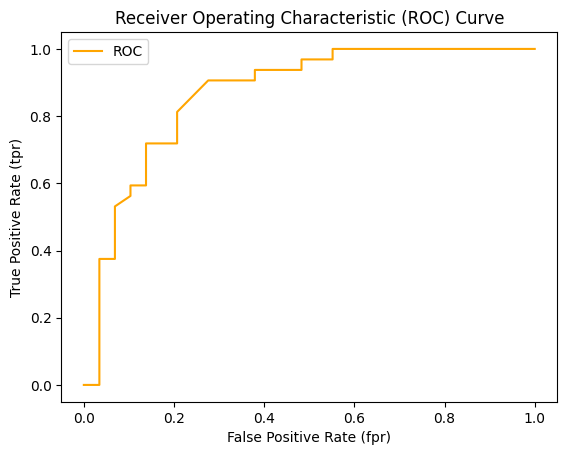

In [95]:
#Create a function for plotting ROC curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model. 
    """

    #Plot ROC Curve
    plt.plot(fpr,tpr, color="orange", label = "ROC")
    #Plot a baseline
    # plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    #Customize the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)


In [96]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive) #This gives area

np.float64(0.8669181034482759)

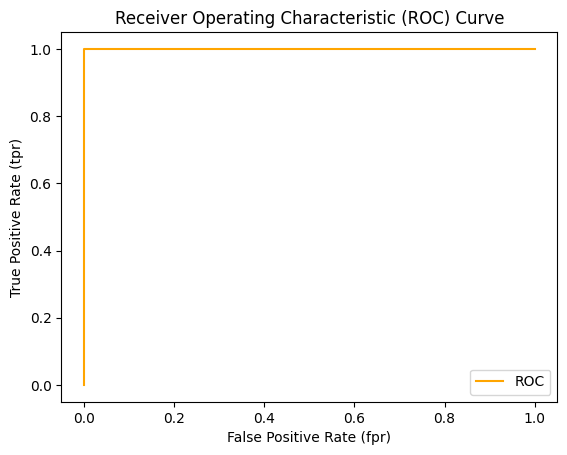

In [97]:
#Plot perfect roc curve and observe its area
fpr, tpr, thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [98]:
#Perfect ROC score 
roc_auc_score(y_test,y_test)

np.float64(1.0)

In a nutshell, what you should remember is:

* ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).

* The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

* The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

Confusion matrix  
Another fantastic way to evaluate a classification model is by using a confusion matrix.  
  
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.  
  
In essence, giving you an idea of where the model is getting confused.  

In [99]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

![Failed To Load](confusion.png)

In [100]:
pd.crosstab(y_test, y_preds,
            rownames=["Actual Label"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


Creating a confusion matrix using Scikit-Learn  
Scikit-Learn has multiple different implementations of plotting confusion matrices:  
  
1. sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y) - this takes a fitted estimator (like our clf model), features (X) and labels (y), it then uses the trained estimator to make predictions on X and compares the predictions to y by displaying a confusion matrix.  
2. sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred) - this takes truth labels and predicted labels and compares them by displaying a confusion matrix.  
Note: Both of these methods/classes require Scikit-Learn 1.0+. To check your version of Scikit-Learn run

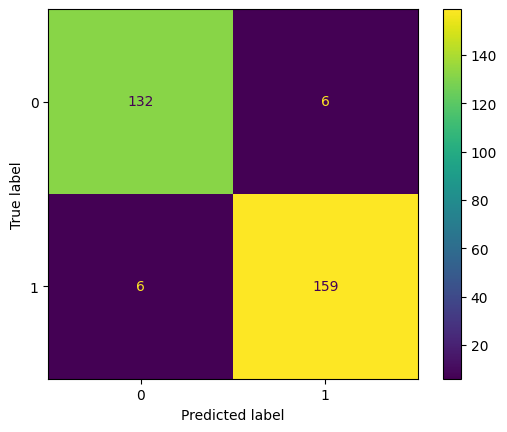

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator = clf, X=X, y=y)

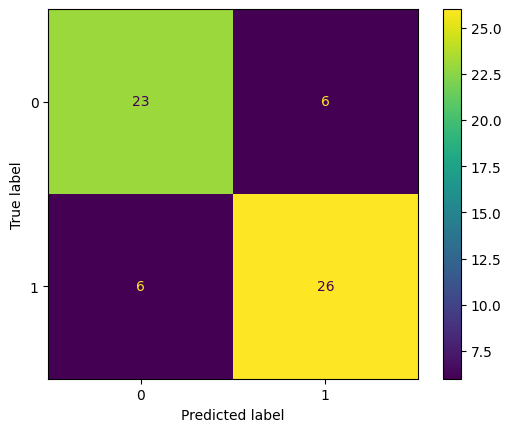

In [102]:
# Option 2
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

Classification report  
The final major metric you should consider when evaluating a classification model is a classification report.  

A classification report is more so a collection of metrics rather than a single one.  

In [103]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



It returns four columns: precision, recall, f1-score and support.  
  
The number of rows will depend on how many different classes there are. But there will always be three rows labell accuracy, macro avg and weighted avg.  
  
Each term measures something slightly different:  
  
* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* Support - The number of samples each metric was calculated on.
* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
* Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).
When should you use each?  
  
It can be tempting to base your classification models perfomance only on accuracy. And accuracy is a good metric to report, except when you have very imbalanced classes.  
  
For example, let's say there were 10,000 people. And 1 of them had a disease. You're asked to build a model to predict who has it.  
  
You build the model and find your model to be 99.99% accurate. Which sounds great! ...until you realise, all its doing is predicting no one has the disease, in other words all 10,000 predictions are false.  
  
In this case, you'd want to turn to metrics such as precision, recall and F1 score.  

In [104]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one case

disease_preds = np.zeros(10000) # every prediction is 0

pd.DataFrame(classification_report(disease_true, 
                                   disease_preds, 
                                   output_dict=True,
                                   zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


You can see here, we've got an accuracy of 0.9999 (99.99%), great precision and recall on class 0.0 but nothing for class 1.0.  
  
Ask yourself, although the model achieves 99.99% accuracy, is it useful?  
  
To summarize:  
  
* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
* Precision and recall become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.

**4.2.2 Regression model evaluation metrics**  
We'll check out the following.  

* R^2 (pronounced r-squared) or coefficient of determination - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1. Higher is better.
* Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were. Lower is better.
* Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors). Lower is better.

In [107]:
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split data into features (X) and labels (y)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train);

R^2 Score (coefficient of determination)  
  
Once you've got a trained regression model, the default evaluation metric in the score() function is R^2.  

In [108]:
# Calculate the models R^2 score
model.score(X_test, y_test)

0.806652667101436

Outside of the score() function, R^2 can be calculated using Scikit-Learn's r2_score() function.  
  
A model which only predicted the mean would get a score of 0.

In [110]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

r2_score(y_test, y_test_mean)

0.0

And a perfect model would get a score of 1.


In [111]:
r2_score(y_test, y_test)

1.0

For your regression models, you'll want to maximise R^2, whilst minimising MAE and MSE.

Mean Absolute Error (MAE)  
  
A model's mean absolute error can be calculated with Scikit-Learn's `sklearn.metrics.mean_absolute_error` method.

In [114]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test, y_preds)
mae

0.32656738464147306

Our model achieves an MAE of 0.327.  
  
This means, on average our models predictions are 0.327 units away from the actual value.  

In [119]:
#Visually

df = pd.DataFrame(data= {
    "Actual Values": y_test,
    "Predictions":y_preds,
})
df.head()

,Actual Values,Predictions
20046,0.47700,0.493900
3024,0.45800,0.754940
15663,5.00001,4.928596
20484,2.18600,2.540240
9814,2.78000,2.331760


You can see the predictions are slightly different to the actual values.

Depending what problem you're working on, having a difference like we do now, might be okay. On the flip side, it may also not be okay, meaning the predictions would have to be closer.

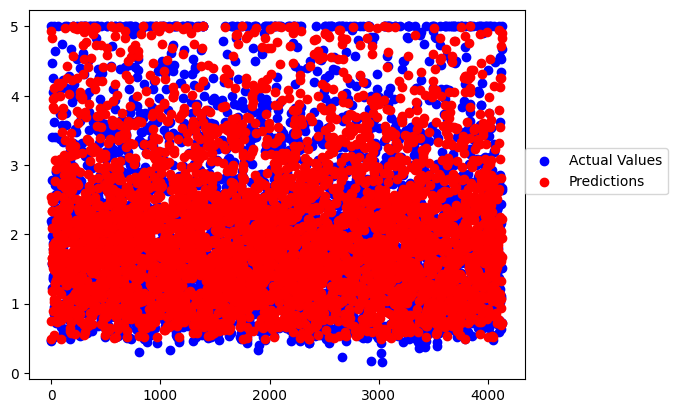

In [122]:
fig, ax = plt.subplots()
x = np.arange(0, len(df), 1)

ax.scatter(x, df["Actual Values"],c = "b", label = "Actual Values")
ax.scatter(x, df["Predictions"],c = "r", label = "Predictions")

ax.legend(loc=(1, 0.5))
plt.show()



Mean Squared Error (MSE)  
  
How about MSE?  
  
We can calculate it with Scikit-Learn's `sklearn.metrics.mean_squared_error`.

In [123]:
#Mean Squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_preds)

mse

0.25336408094921037

MSE will often be higher than MAE because is squares the errors rather than only taking the absolute difference into account.  
  
Now you might be thinking, which regression evaluation metric should you use?  
  
* R^2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R^2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.
* MAE gives a better indication of how far off each of your model's predictions are on average.
* As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).  
    * Pay more attention to MAE: When being $10,000 off is twice as bad as being $5,000 off.
    * Pay more attention to MSE: When being $10,000 off is more than twice as bad as being $5,000 off.

**4.2.3 Evaluating a model using the scoring parameter**

We've covered a bunch of ways to evaluate a model's predictions but haven't even touched the scoring parameter...

Not to worry, it's very similar to what we've been doing!

As a refresh, the scoring parameter can be used with a function like cross_val_score() to tell Scikit-Learn what evaluation metric to return using cross-validation.

In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [125]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X,y, cv =5)
cv_acc


array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

We've seen this before, now we got 5 different accuracy scores on different test splits of the data.

Averaging this gives the cross-validated accuracy.

In [127]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


We can find the same using the scoring parameter and passing it "accuracy"

In [133]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


The same goes for the other metrics we've been using for classification.

Let's try "precision".

In [135]:
#Precision 
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precision):.2f}")

The cross-validated precision is: 0.83


How about "recall"?

In [136]:
#recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, scoring="recall")
print(f"The cross-validated precision is: {np.mean(cv_recall):.2f}")

The cross-validated precision is: 0.85


And "f1" (for F1 score)?

In [138]:
np.random.seed(42)
cv_f1 = cross_val_score(clf,X, y, scoring="f1")
print(f"The cross-validated F1 score is: {np.mean(cv_f1):.2f}")

The cross-validated F1 score is: 0.84


We can repeat this process with our regression metrics.

In [139]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

The default is "r2".  
  
Note: We can time how long a single cell of code takes to run using the %%time magic command.

In [140]:
%%time 
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
print(f"The cross-validated R^2 score is: {np.mean(cv_r2):.2f}")

The cross-validated R^2 score is: 0.65
CPU times: total: 1min 4s
Wall time: 1min 5s


But we can use "neg_mean_absolute_error" for MAE (mean absolute error).

In [144]:
%%time
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv =3, scoring ="neg_mean_absolute_error")
np.mean(cv_mae)

CPU times: total: 31.9 s
Wall time: 32.3 s


np.float64(-0.48352491831879857)

Why the "neg_"?

Because Scikit-Learn documentation states:

"All scorer objects follow the convention that higher return values are better than lower return values."

Which in this case, means a lower negative value (closer to 0) is better.



What about "neg_mean_squared_error" for MSE (mean squared error)?

In [143]:
%%time
cv_mse = cross_val_score(model , X , y, cv=5, scoring="neg_mean_squared_error")
print(f"The cross-validated MSE score is: {np.mean(cv_mse):.2f}")

The cross-validated MSE score is: -0.43
CPU times: total: 1min 5s
Wall time: 1min 5s


**4.3 Using different evaluation metrics with Scikit-Learn**
Remember the third way of evaluating Scikit-Learn functions?

Problem-specific metric functions. Similar to how the scoring parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.
Well, we've kind of covered this third way of using evaulation metrics with Scikit-Learn.

In essence, all of the metrics we've seen previously have their own function in Scikit-Learn.

They all work by comparing an array of predictions, usually called y_preds to an array of actual labels, usually called y_test or y_true.

Classification functions  
For:  
  
Accuracy we can use sklearn.metrics.accuracy_score  
Precision we can use sklearn.metrics.precision_score  
Recall we can use sklearn.metrics.recall_score  
F1 we can use sklearn.metrics.f1_score  

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

np.random.seed(42)

X = heart_disease.drop("target", axis =1 )
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

y_preds = clf.predict(X_test)

#Evaluate the classifier
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test,y_preds) * 100: .2f}% ")
print(f"Recall score :{recall_score(y_test,y_preds) : .2f} ")
print(f"Precision score: {precision_score(y_test,y_preds) : .2f}")
print(f"F1: {f1_score(y_test,y_preds) : .2f}")


Classifier metrics on the test set:
Accuracy:  85.25% 
Recall score : 0.88 
Precision score:  0.85
F1:  0.86


Regression metrics  
We can use a similar setup for our regression problem, just with different methods.  
  
For:  
  
R^2 we can use sklearn.metrics.r2_score  
MAE (mean absolute error) we can use sklearn.metrics.mean_absolute_error  
MSE (mean squared error) we can use sklearn.metrics.mean_squared_error  

In [112]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

model = RandomForestRegressor( n_estimators= 100 , n_jobs= -1)
model.fit(X_train, y_train)

#Make predictions
y_preds = model.predict(X_test)

#Evaluate the model:
print("Regression model metrics on test size:")
print(f" R^2: {r2_score(y_test,y_preds) * 100 :.2f}%")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")



Regression model metrics on test size:
 R^2: 80.94%
MAE: 0.33
MSE: 0.26


**5. Improving model predictions through experimentation (hyperparameter tuning)**
The first predictions you make with a model are generally referred to as baseline predictions.  
  
It's similar for the first evaluation metrics you get. These are generally referred to as baseline metrics.  
  
Your next goal is to improve upon these baseline metrics.  
  
How?  
  
Experiment, experiment, experiment!  
  
Two of the main methods to improve baseline metrics are:  
  
From a data perspective.  
From a model perspective.  
From a data perspective asks:  
  
Could we collect more data? In machine learning, more data is generally better, as it gives a model more opportunities to learn patterns.  
Could we improve our data? This could mean filling in misisng values or finding a better encoding (turning data into numbers) strategy.  
From a model perspective asks:  
  
Is there a better model we could use? If you've started out with a simple model, could you use a more complex one? (we saw an example of this when looking at the Scikit-Learn machine learning map, ensemble methods are generally considered more complex models)  
Could we improve the current model? If the model you're using performs well straight out of the box, can the hyperparameters be tuned to make it even better?  
Note: Patterns in data are also often referred to as data parameters. The difference between parameters and hyperparameters is a machine learning model seeks to find parameters in data on its own, where as, hyperparameters are settings on a model which a person (you) can adjust.  
  
Since we have two existing datasets, we'll look at improving our results from a model perspective.    
  
More specifically, we'll look at how we could improve our RandomForestClassifier and RandomForestRegressor models through hyperparameter tuning.  
  
What even are hyperparameters?  
  
Good question, let's check them out.  
  
First, we'll instantiate a RandomForestClassifier.  

In [27]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [28]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

![Figure Not Found](hyper_param.png)

You'll see things like max_depth, min_samples_split, n_estimators.

Each of these is a hyperparameter of the RandomForestClassifier you can adjust.

You can think of hyperparameters as being similar to dials on an oven.

On the default setting your oven might do an okay job cooking your favourite meal. But with a little experimentation, you find it does better when you adjust the settings.

The same goes for imporving a machine learning model by hyperparameter tuning.

The default hyperparameters on a machine learning model may find patterns in data well. But there's a chance a adjusting the hyperparameters may improve a models performance.

Every machine learning model will have different hyperparameters you can tune.

You might be thinking, "how the hell do I remember all of these?"

Another good question.

It's why we're focused on the Random Forest.

Instead of memorizing all of the hyperparameters for every model, we'll see how it's done with one.

And then knowing these principles, you can apply them to a different model if needed.

Reading the Scikit-Learn documentation for the Random Forest, you'll find they suggest trying to change n_estimators (the number of trees in the forest) and min_samples_split (the minimum number of samples required to split an internal node).

We'll try tuning these as well as:

* max_features (the number of features to consider when looking for the best split)
* max_depth (the maximum depth of the tree)
* min_samples_leaf (the minimum number of samples required to be at a leaf node)
If this still sounds like a lot, the good news is, the process we're taking with the Random Forest and tuning its hyperparameters, can be used for other machine learning models in Scikit-Learn. The only difference is, with a different model, the hyperparameters you tune will be different.

Adjusting hyperparameters is usually an experimental process to figure out which are best. As there's no real way of knowing which hyperparameters will be best when starting out.

To get familar with hyparameter tuning, we'll take our RandomForestClassifier and adjust its hyperparameters in 3 ways.

* By hand
* Randomly with sklearn.model_selection.RandomizedSearchCV
* Exhaustively with sklearn.model_selection.GridSearchCV

**5.1 Tuning hyperparameters by hand**    
So far we've worked with training and test datasets.   
  
You train a model on a training set and evaluate it on a test dataset.  
  
But hyperparameter tuning introduces a thrid set, a validation set.  
  
Now the process becomes:  
  
Train a model on the training data.  
(Try to) improve the model's hyperparameters on the validation set.  
Evaluate the model on the test set.  
If our starting dataset contained 100 different patient records labels indicating who had heart disease and who didn't and we wanted to build a machine learning model to predict who had heart disease and who didn't, it might look like this:  



![Failed To Load](hand.png)

And we're going to adjust:

* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators
We'll use the same code as before, except this time we'll create a training, validation and test split.

With the training set containing 70% of the data and the validation and test sets each containing 15%.

Let's get some baseline results, then we'll tune the model.

And since we're going to be evaluating a few models, let's make an evaluation function.

In [61]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels on classification.
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    f1 = f1_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)

    metrics_dict = {
        "accuracy": round(accuracy,2),
        "precision": round(precision,2),
        "recall":round(recall,2),
        "f1": round(f1,2),
    }
    print(f"Accuracy = {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    return metrics_dict


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Set the seed
np.random.seed(42)

# Read in the data
# heart_disease = pd.read_csv("../data/heart-disease.csv") # load in from local directory
heart_disease = pd.read_csv("heart_disease.csv")

# Split into X (features) & y (labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Training and test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create validation and test split by spliting testing data in half (30% test -> 15% validation, 15% test)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy = 80.00%
Precision: 0.78
Recall: 0.88
F1 score: 0.82


{'accuracy': 0.8, 'precision': 0.78, 'recall': 0.88, 'f1': 0.82}

We'll change 1 of the hyperparameters, n_estimators=100 (default) to n_estimators=200 and see if it improves on the validation set.

In [64]:
np.random.seed(42)

# Create a second classifier
clf_2 = RandomForestClassifier(n_estimators=200)
clf_2.fit(X_train, y_train)

# Make predictions
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)
clf_2_metrics

Accuracy = 77.78%
Precision: 0.77
Recall: 0.83
F1 score: 0.80


{'accuracy': 0.78, 'precision': 0.77, 'recall': 0.83, 'f1': 0.8}

Hmm, it looks like doubling the n_estimators value performs worse than the default, perhaps there's a better value for n_estimators?  
  
And what other hyperparameters could we change?  
  
Wait...  
  
This could take a while if all we're doing is building new models with new hyperparameters each time.  
  
Surely there's a better way?  
  
There is.  

**5.2 Hyperparameter tuning with RandomizedSearchCV**  
Scikit-Learn's sklearn.model_selection.RandomizedSearchCV allows us to randomly search across different hyperparameters to see which work best.  
  
It also stores details about the ones which work best!  
  
Let's see it in action.  
  
First, we create a dictionary of parameter distributions (collections of different values for specific hyperparamters) we'd like to search over.  
  
This dictionary comes in the form:  
  
param_distributions = {"hyperparameter_name": [values_to_randomly_try]}  
Where "hyperparameter_name" is the value of a specific hyperparameter for a model and  [values_to_randomly_try] is a list of values for that specific hyperparamter to randomly try.  

In [65]:
# Hyperparameter grid RandomizedSearchCV will search over
param_distributions = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
                       "max_depth": [None, 5, 10, 20, 30],
                       "max_features": ["sqrt", "log2", None],
                       "min_samples_split": [2, 4, 6, 8],
                       "min_samples_leaf": [1, 2, 4, 8]}

Where did these values come from?  
  
They're made up.  
  
Made up?  
  
Yes.  
  
Not completely pulled out of the air but after reading the Scikit-Learn documentation on Random Forest's you'll see some of these values have certain values which usually perform well and certain hyperparameters take strings rather than integers.  
  
Now we've got the parameter distribution dictionary setup, Scikit-Learn's RandomizedSearchCV will look at it, pick a random value from each, instantiate a model with those values and test each model.  
  
How many models will it test?  
  
As many as there are for each combination of hyperparameters to be tested. Let's add them up.

In [66]:
# Count the total number of hyperparameter combinations to test
total_randomized_hyperparameter_combintions_to_test = np.prod([len(value) for value in param_distributions.values()])
print(f"There are {total_randomized_hyperparameter_combintions_to_test} potential combinations of hyperparameters to test.")

There are 1440 potential combinations of hyperparameters to test.


Woah!  
  
That's a lot of combinations!  
  
Or...  
  
We can set the n_iter parameter to limit the number of models RandomizedSearchCV tests (e.g. n_iter=20 means to try 20 different random combintations of hyperparameters and will cross-validate each set, so if cv=5, 5x20 = 100 total fits).  
  
The best thing?  
  
The results we get will be cross-validated (hence the CV in RandomizedSearchCV) so we can use train_test_split().  
  
And since we're going over so many different models, we'll set n_jobs=-1 in our RandomForestClassifier so Scikit-Learn takes advantage of all the cores (processors) on our computers.  
  
Let's see it in action.

In [67]:
# Start the timer
import time
start_time = time.time()

from sklearn.model_selection import RandomizedSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all available cores on your machine (if this causes errors, try n_jobs=1)
clf = RandomForestClassifier(n_jobs=-1)

# Setup RandomizedSearchCV 
n_iter = 30 # try 30 models total
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=param_distributions,
                            n_iter=n_iter, 
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf (does cross-validation for us, so no need to use a validation set)
rs_clf.fit(X_train, y_train);

# Finish the timer
end_time = time.time()
print(f"[INFO] Total time taken for {n_iter} random combinations of hyperparameters: {end_time - start_time:.2f} seconds.")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=2, n_estimators=50

In [68]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 30}

In [72]:
#Make predictons with best hyper-parameters
rs_y_preds = rs_clf.predict(X_test)

#Evaluate
rs_metrics = evaluate_preds(y_test, rs_y_preds)



Accuracy = 85.25%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


**5.3 Hyperparameter tuning with GridSearchCV**  
There's one more way we could try to improve our model's hyperparamters.  
  
And it's with sklearn.model_selection.GridSearchCV.  
  
The main difference between GridSearchCV and RandomizedSearchCV is GridSearchCV searches across a grid of hyperparamters exhaustively (it will try every combination possible), where as, RandomizedSearchCV searches across a grid of hyperparameters randomly (stopping after n_iter combinations).  
  
GridSearchCV also refers to a dictionary of parameter distributions as a parameter grid (via the parameter param_grid)

In [73]:
param_distributions

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_split': [2, 4, 6, 8],
 'min_samples_leaf': [1, 2, 4, 8]}

RandomizedSearchCV tries n_iter combinations of different values.  
  
Where as, GridSearchCV will try every single possible combination.  
  
And if you remember from before when we did the calculation: max_depth has 4 values, max_features has 2, min_samples_leaf has 3, min_samples_split has 3, n_estimators has 5.  
  
That's 4x2x3x3x5 = 360 models!  
  
This could take a long time depending on the power of the computer you're using, the amount of data you have and the complexity of the hyperparamters (usually higher values means a more complex model).
  
In our case, the data we're using is relatively small (only ~300 samples).  

Since we've already tried to find some ideal hyperparameters using RandomizedSearchCV, we'll create another hyperparameter grid based on the best_params_ of rs_clf with less options and then try to use GridSearchCV to find a more ideal set.  
  
In essence, the workflow could be:  
  
1. Tune hyperparameters by hand to get a feel of the data/model.  
2. Create a large set of hyperparameter distributions and search across them randomly with RandomizedSearchCV.
3. Find the best hyperparameters from 2 and reduce the search space before searching across a smaller subset exhaustively with GridSearchCV  

In [75]:
# Create hyperparameter grid similar to rs_clf.best_params_
param_grid = {"n_estimators": [200, 1000],
              "max_depth": [30, 40, 50],
              "max_features": ["log2"],
              "min_samples_split": [2, 4, 6, 8],
              "min_samples_leaf": [4]}
#We've created another grid of hyperparameters to search over, this time with less total.

In [76]:
# Count the total number of hyperparameter combinations to test
total_grid_search_hyperparameter_combinations_to_test = np.prod([len(value) for value in param_grid.values()])
print(f"There are {total_grid_search_hyperparameter_combinations_to_test} combinations of hyperparameters to test.")
print(f"This is {total_randomized_hyperparameter_combintions_to_test/total_grid_search_hyperparameter_combinations_to_test} times less\
 than before (previous: {total_randomized_hyperparameter_combintions_to_test}).")

There are 24 combinations of hyperparameters to test.
This is 60.0 times less than before (previous: 1440).


Now when we run GridSearchCV, passing it our classifier (clf), parameter grid (param_grid) and the number of cross-validation folds we'd like to use (cv=5), it'll create a model with every single combination of hyperparameters, and then cross-validate each 5 times (for example, 36 hyperparameter combinations * 5 = 135 fits in total) and check the results.  

In [77]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

X = heart_disease.drop("target",axis = 1)
y = heart_disease["target"]

#Split into test and train

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

clf = RandomForestClassifier(n_jobs= -1)

gs_clf = GridSearchCV(estimator= clf, 
                      param_grid= param_grid,
                      cv = 5,
                      verbose= 2)

gs_clf.fit(X_train, y_train);

# Find the running time
end_time = time.time()

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   3.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   3.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=

In [78]:
# How long did it take? 
total_time = end_time - start_time
print(f"[INFO] The total running time for running GridSearchCV was {total_time:.2f} seconds.")

[INFO] The total running time for running GridSearchCV was 3281.63 seconds.


In [79]:
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

And by default when we call the predict() function on gs_clf, it'll use the best hyperparameters.

In [80]:
# Max predictions with the GridSearchCV classifier
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)
gs_metrics

Accuracy = 88.52%
Precision: 0.88
Recall: 0.91
F1 score: 0.89


{'accuracy': 0.89, 'precision': 0.88, 'recall': 0.91, 'f1': 0.89}

<Axes: >

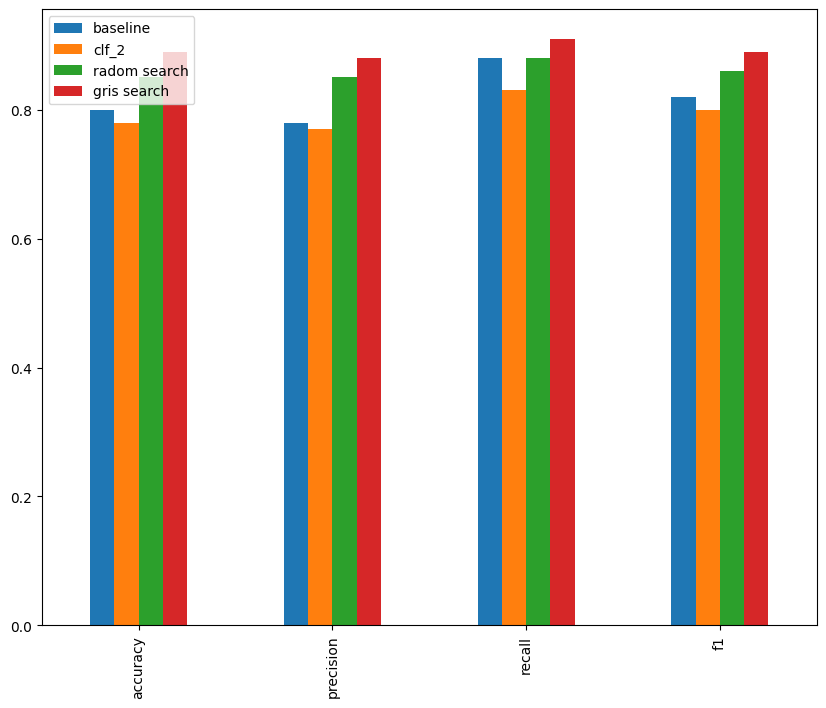

In [84]:
compare_metrics = pd.DataFrame({
    "baseline":baseline_metrics,
    "clf_2":clf_2_metrics,
    "radom search":rs_metrics,
    "gris search":gs_metrics
})
compare_metrics.plot.bar(figsize=(10, 8))

Nice!  
  
After trying many different combinations of hyperparamters, we get a slight improvement in results.  
  
However, sometimes you'll notice that your results don't change much.  
  
These things might happen.  
  
But it's important to remember, it's not over. There more things you can try.  
  
In a hyperparameter tuning sense, there may be a better set we could find through more extensive searching with RandomizedSearchCV and GridSearchCV, this would require more experimentation.  
  
Other techniques you could:  
  
* Collecting more data - Based on the results our models are getting now, it seems like they're very capable of finding patterns. Collecting more data may improve a models ability to find patterns. However, your ability to do this will largely depend on the project you're working on.
* Try a more advanced model - Although our tuned Random Forest model is doing pretty well, a more advanced ensemble method such as XGBoost or CatBoost might perform better. I'll leave these for extra-curriculum.
Since machine learning is part engineering, part science, these kind of experiments are common place in any machine learning project.  
  
Now we've got a tuned Random Forest model, let's find out how we might save it and export it so we can share it with others or potentially use it in an external application.  

**6. Saving and loading trained machine learning models**  
Our GridSearchCV model (gs_clf) has the best results so far, we'll export it and save it to file.  
  
**6.1 Saving and loading a model with pickle**  
We saw right at the start, one way to save a model is using Python's pickle module.  
  
We'll use pickle's dump() method and pass it our model, gs_clf, along with the open() function containing a string for the filename we want to save our model as, along with the "wb" string which stands for "write binary", which is the file type open() will write our model as.

In [85]:
import pickle

#Save an existing model to file
best_model_file_name_pickle = "gs_random_forest_model_1.pkl"
pickle.dump(gs_clf, open(best_model_file_name_pickle, "wb"))

Once it's saved, we can import it using pickle's load() function, passing it open() containing the filename as a string and "rb" standing for "read binary".

In [86]:
# Load a saved model
loaded_pickle_model = pickle.load(open(best_model_file_name_pickle, "rb"))

Once you've reimported your trained model using pickle, you can use it to make predictions as usual.

In [87]:
# Make predictions and evaluate the loaded model
pickle_y_preds = loaded_pickle_model.predict(X_test)
loaded_pickle_model_metrics = evaluate_preds(y_test, pickle_y_preds)
loaded_pickle_model_metrics

Accuracy = 88.52%
Precision: 0.88
Recall: 0.91
F1 score: 0.89


{'accuracy': 0.89, 'precision': 0.88, 'recall': 0.91, 'f1': 0.89}

**6.2 Saving and loading a model with joblib**

The other way to load and save models is with joblib. Which works relatively the same as pickle.  
  
To save a model, we can use joblib's dump() function, passing it the model (gs_clf) and the desired filename.

In [88]:
from joblib import dump, load

# Save a model to file
best_model_file_name_joblib = "gs_random_forest_model_1.joblib"
dump(gs_clf, filename=best_model_file_name_joblib) 

['gs_random_forest_model_1.joblib']

Once you've saved a model using dump(), you can import it using load() and passing it the filename of the model.

In [89]:
# Import a saved joblib model
loaded_joblib_model = load(filename=best_model_file_name_joblib)

Again, once imported, we can make predictions with our model.

In [90]:
# Make and evaluate joblib predictions 
joblib_y_preds = loaded_joblib_model.predict(X_test)
loaded_joblib_model_metrics = evaluate_preds(y_test, joblib_y_preds)
loaded_joblib_model_metrics

Accuracy = 88.52%
Precision: 0.88
Recall: 0.91
F1 score: 0.89


{'accuracy': 0.89, 'precision': 0.88, 'recall': 0.91, 'f1': 0.89}

So which one should you use, pickle or joblib?

According to Scikit-Learn's model persistence documentation, they suggest it may be more efficient to use joblib as it's more efficient with large numpy arrays (which is what may be contained in trained/fitted Scikit-Learn models).

**7. Revisiting the entire pipeline**  
We've covered a lot. And so far, it seems to be all over the place, which it is.  
  
But not to worry, machine learning projects often start out like this.  
  
A whole bunch of experimenting and code all over the place at the start and then once you've found something which works, the refinement process begins.  
  
What would this refinement process look like?  
  
We'll use the car sales regression problem (predicting the sale price of cars) as an example.  
  
To tidy things up, we'll be using Scikit-Learn's sklearn.pipeline.Pipeline class.  
  
You can imagine Pipeline as being a way to string a number of different Scikit-Learn processes together.  

**7.1 Creating a regression Pipeline**  
You might recall when, way back in Section 2: Getting Data Ready, we dealt with the car sales data, to build a regression model on it, we had to encode the categorical features into numbers and fill the missing data.  
  
The code we used worked, but it was a bit all over the place.  
  
Good news is, Pipeline can help us clean it up.  
  
Let's remind ourselves what our car-sales-extended-missing-data.csv looks like in DataFrame form.  

In [91]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [93]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [94]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

There's 1000 rows, three features are categorical (Make, Colour, Doors), the other two are numerical (Odometer (KM), Price) and there's 249 missing values.  
  
We're going to have to turn the categorical features into numbers and fill the missing values before we can fit a model.  
  
We'll build a Pipeline to do so.  
  
Pipeline's main input parameter is steps which is a list of tuples ([(step_name, action_to_take)]) of the step name, plus the action you'd like it to perform.  
  
In our case, you could think of the steps as:  
  
Fill missing data  
Convert data to numbers  
Build a model on the data  
Let's do it!

In [95]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop the rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor(n_jobs=-1))])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787864

What we've done is combine a series of data preprocessing steps (filling missing values, encoding numerical values) as well as a model into a Pipeline.  
  
Doing so not only cleans up the code, it ensures the same steps are taken every time the code is run rather than having multiple different processing steps happening in different stages.  
  
It's also possible to GridSearchCV or RandomizedSearchCV with a Pipeline.  
  
The main difference is when creating a hyperparameter grid, you have to add a prefix to each hyperparameter (see the documentation for RandomForestRegressor for a full list of possible hyperparameters to tune).  
  
The prefix is the name of the Pipeline step you'd like to alter, followed by two underscores.  
  
For example, to adjust n_estimators of "model" in the Pipeline, you'd use: "model__n_estimators" (note the double underscore after model__ at the start).  

In [96]:

%%time

# Using grid search with pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"], # note the double underscore after each prefix "preprocessor__"
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model',
                                        RandomForestRegressor(n_jobs=-1))]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [97]:
# Score the best model
gs_model.score(X_test, y_test)

0.2848784564026805

Beautiful!  
  
Using GridSearchCV we see a nice boost in our models score.  
  
And the best thing is, because it's all in a Pipeline, we could easily replicate these results.